In [9]:
pip install bokeh

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./netflix_titles.csv')

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [58]:
len(df)

6234

In [59]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [103]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [107]:
temp_df = df['rating'].value_counts().reset_index()

In [86]:
temp_df['index'].values

array(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'NR', 'PG', 'TV-Y7',
       'TV-G', 'TV-Y', 'TV-Y7-FV', 'G', 'UR', 'NC-17'], dtype=object)

In [109]:
from bokeh.plotting import figure,show

p = figure(plot_width=1000, plot_height=400,title='MOST OF PROGRAMME ON NEYFLIX IS TV-14 & TV-MA RATED', x_range=temp_df['index'].values)
p.vbar(x= temp_df['index'].values , width=0.7, bottom=0,top= temp_df['rating'].values,color="firebrick")
show(p)

Loading BokehJS ...

In [98]:
df['type'].value_counts().reset_index()

,index,type
0,Movie,4265
1,TV Show,1969


In [100]:
temp_df2 = df['type'].value_counts().reset_index()

In [107]:
from bokeh.plotting import figure,show
p = figure(plot_width=400, plot_height=400,x_range=temp_df2['index'].values)
p.vbar(x= temp_df2['index'] , width=0.5, bottom=0,top= temp_df2['type'],
       color=["firebrick","grey"])

show(p)


Loading BokehJS ...

In [17]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show

source = ColumnDataSource(data=dict(
    x=df['release_year'],
    y1=,
    y2=temp_df2,
))
p = figure(plot_width=400, plot_height=400)

p.vbar(top=['y1', 'y2'], x='x', source=source,width=0.5, bottom=0)

show(p)

RuntimeError: 

Expected top to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.circle(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.circle(x=a_list, y=an_array, ...)  # pass actual sequences and no source



In [60]:
df_movie=(df['type']=='Movie').value_counts()

In [10]:
df_movie

True     4265
False    1969
Name: type, dtype: int64

In [341]:
df[df["type"] == "TV Show"].groupby('type')['release_year']

In [105]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()

In [106]:
temp_df1

,index,rating
0,TV-MA,679
1,TV-14,660
2,TV-PG,269
3,TV-Y,102
4,TV-Y7,100
5,TV-G,69
6,TV-Y7-FV,68
7,NR,16
8,R,2
9,G,1


In [14]:
temp_df2

,index,rating
0,TV-MA,1348
1,TV-14,1038
2,R,506
3,TV-PG,432
4,PG-13,286
5,NR,202
6,PG,183
7,TV-G,80
8,TV-Y7,69
9,TV-Y,41


In [204]:
from bokeh.plotting import figure,show
p = figure(plot_width=800, plot_height=400,x_range=temp_df2['index'].values)
p.vbar(x= temp_df2['index'] , width=0.5, bottom=0,top= temp_df2['rating'],
       color="firebrick")
p.vbar(x= temp_df1['index'] , width=0.5, bottom=0,top= temp_df1['rating'],
       color="firebrick")
show(p)

In [359]:
a = df.groupby(('type'))['rating']

type
Movie      AxesSubplot(0.125,0.125;0.775x0.755)
TV Show    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating, dtype: object

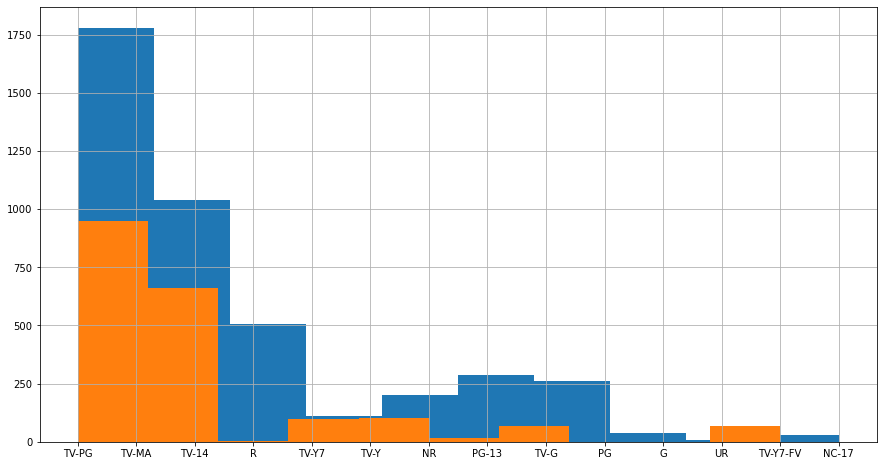

In [26]:
a.hist(figsize=(15,8))

In [50]:
a.describe()

,count,unique,top,freq
type,,,,
Movie,4257,14,TV-MA,1348
TV Show,1967,11,TV-MA,679


In [49]:
from bokeh.plotting import figure, show



p = figure()
p.quad(top=a.count(), bottom=0, line_color="white")


show(p)

In [61]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373d268190>]],
      dtype=object)

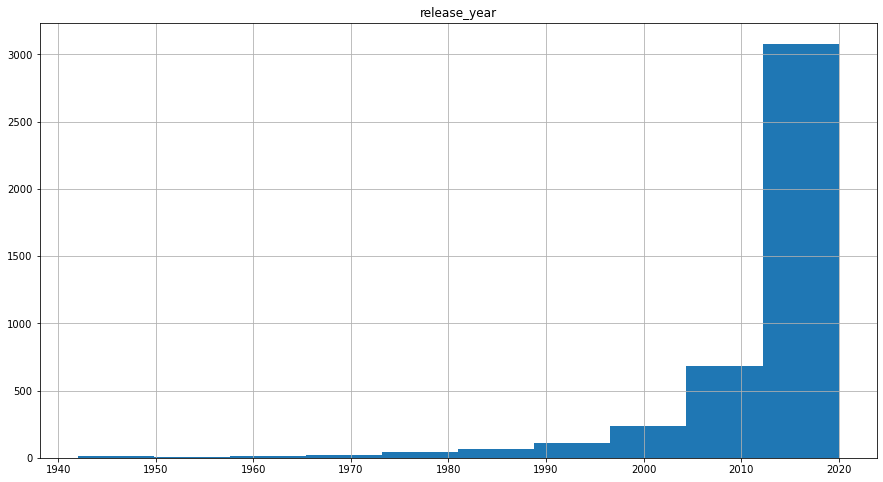

In [62]:
movie.hist(column='release_year',figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373d1de730>]],
      dtype=object)

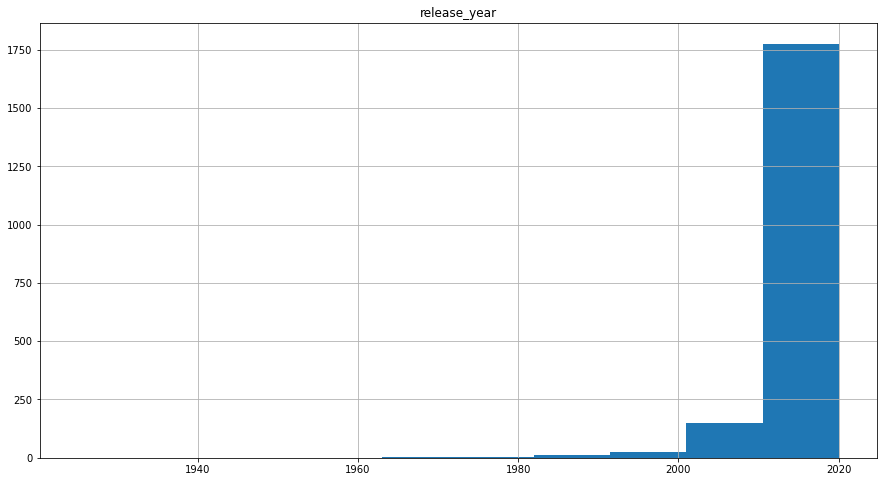

In [64]:
df1.hist(column='release_year',figsize=(15,8))

In [30]:
len(df[df['release_year']==1925])

1

In [75]:
director = df['director'].value_counts().reset_index()

In [104]:
director['index'].unique()

array(['Raúl Campos, Jan Suter', 'Marcus Raboy', 'Jay Karas', ...,
       'Tim Bartley', 'Gary Mak', 'Tanawat Aiemjinda'], dtype=object)

In [117]:
director

,index,director
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,13
3,Jay Chapman,12
4,Martin Scorsese,9
...,...,...
3296,Harry Baweja,1
3297,Raymond Wood,1
3298,Tim Bartley,1
3299,Gary Mak,1


In [210]:
director.describe()

,director
count,3301.000000
mean,1.292033
std,0.908625
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,18.000000


In [112]:
director[director['index']=='Raúl Campos, Jan Suter']

,index,director
0,"Raúl Campos, Jan Suter",18


In [240]:
list_of_letters = list(director['index'])

In [245]:
list_of_letters

['Raúl Campos, Jan Suter',
 'Marcus Raboy',
 'Jay Karas',
 'Jay Chapman',
 'Martin Scorsese',
 'Steven Spielberg',
 'Johnnie To',
 'Lance Bangs',
 'David Dhawan',
 'Quentin Tarantino',
 'Shannon Hartman',
 'S.S. Rajamouli',
 'Cathy Garcia-Molina',
 'Ryan Polito',
 'Hakan Algül',
 'Ram Gopal Varma',
 'Wenn V. Deramas',
 'Omoni Oboli',
 'Robert Vince',
 'Matt Askem',
 'Don Michael Paul',
 'Fernando Ayllón',
 'Kunle Afolayan',
 'Yılmaz Erdoğan',
 'Robert Rodriguez',
 'Noah Baumbach',
 'Vlad Yudin',
 'David Batty',
 'Sameh Abdulaziz',
 'Anees Bazmee',
 'Troy Miller',
 'Madhur Bhandarkar',
 'Manny Rodriguez',
 'Riri Riza',
 'Kevin Smith',
 'Poj Arnon',
 'Umesh Mehra',
 'Rajiv Mehra',
 'Priyadarshan',
 'McG',
 'Rocky Soraya',
 'Mike Clattenburg',
 'Kıvanç Baruönü',
 'Nagesh Kukunoor',
 'Steven Soderbergh',
 'Ashutosh Gowariker',
 'Vishal Bhardwaj',
 'Milan Luthria',
 'Cristina Jacob',
 'Detlev Buck',
 'Subhash Ghai',
 'Farhan Akhtar',
 'Rohit Jugraj',
 'Rajkumar Santoshi',
 'Chris Stokes',
 

In [297]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
source = ColumnDataSource(data=dict(
    x=director['index'],
    y=director['director'],
))
TOOLTIPS = [
    ("Director", "@x"),
    ("Number of movies/series", "$y{i}"),
]

p = figure(plot_width=1500, plot_height=600,tooltips=TOOLTIPS, x_range=director['index'][0:15].values)
p.vbar(x='x', width=0.5, bottom=0,
       top='y', color="navy",source=source)

show(p)

In [289]:
director[director['index']=='Marcus Raboy']

,index,director
1,Marcus Raboy,14


In [269]:
len(director[director['director']==3])

114

In [114]:
country_df = df['country'].value_counts().reset_index()

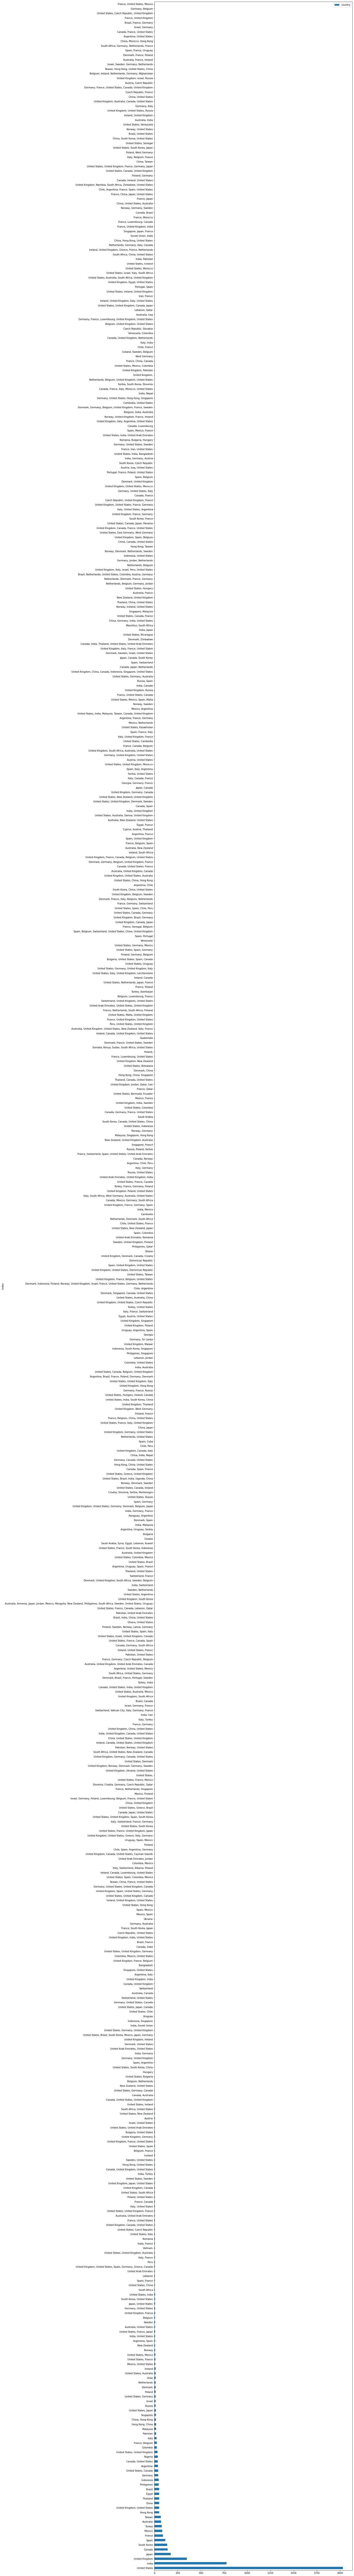

In [299]:
country_df.plot(x='index',kind='barh',figsize=(15,200))

In [336]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap

source = ColumnDataSource(data=dict(
    x=country_df['index'],
    y=country_df['country'],
))
TOOLTIPS = [
    ("Country", "@x"),
    ("Number of movies/series", "$y{i}"),
]

p = figure(plot_width=1000, plot_height=600,tooltips=TOOLTIPS, y_range=country_df['index'][0:30].values)
p.hbar(y='x', height=0.5, left=0,
       right='y',source=source,color="#c9d989")

show(p)

In [116]:
len(country_df)

554

In [119]:
country_df

,index,country
0,United States,2032
1,India,777
2,United Kingdom,348
3,Japan,176
4,Canada,141
...,...,...
549,"Brazil, France, Germany",1
550,"France, United Kingdom",1
551,"United States, Czech Republic, United Kingdom",1
552,"Germany, Belgium",1


In [141]:
df[df['country']=='United States']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,"September 8, 2017",2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...
...,...,...,...,...,...,...,...,...,...,...,...,...
6225,70153412,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."


In [132]:
df[df['country']=='India'].count()

show_id         777
type            777
title           777
director        721
cast            755
country         777
date_added      777
release_year    777
rating          777
duration        777
listed_in       777
description     777
dtype: int64

In [143]:
year = df['release_year'].value_counts().reset_index()

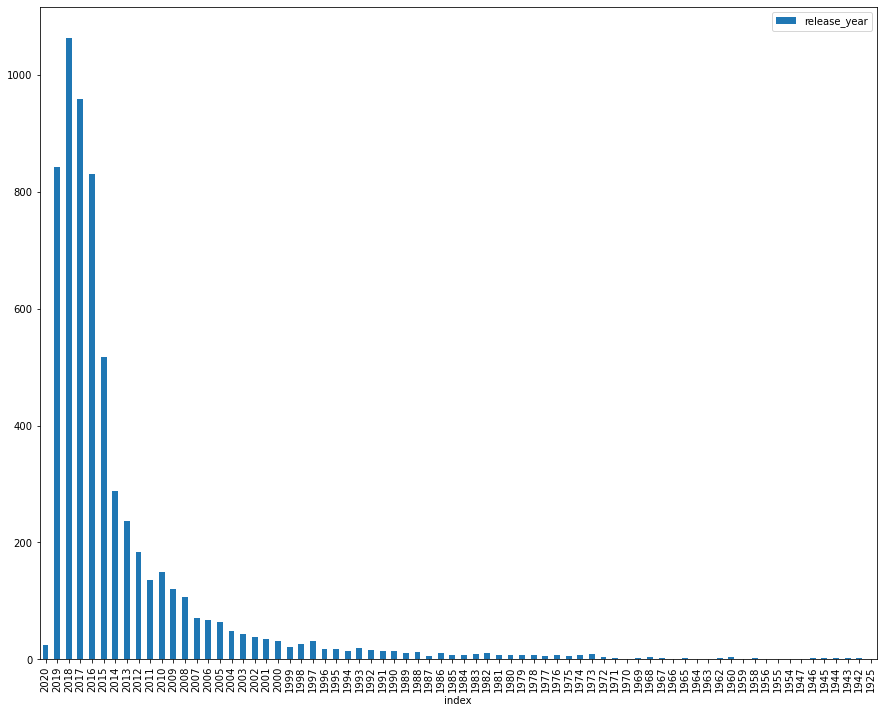

In [162]:
year.plot(x='index',y='release_year',kind='bar',figsize=(15,12))

In [156]:
year = year.sort_values(by='index',ascending=False)

In [205]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
source = ColumnDataSource(data=dict(
    x=year['index'],
    y=year['release_year'],
))
TOOLTIPS = [
    ("Release date", "$x{i}"),
    ("(y)", "($y{i})"),
]

p = figure(plot_width=1000, plot_height=400,tooltips=TOOLTIPS)
p.vbar(x='x', width=0.5, bottom=0,
       top='y', color="firebrick",source=source)

show(p)

In [55]:
len(df['listed_in'].unique())

461

In [56]:
df['listed_in'].unique()

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Docuseries, Science & Nature TV', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Children & Family Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Docuseries', 'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, 

In [98]:
df.groupby(["release_year"]).get_group(2016)[['title','director']]

,title,director
1,Jandino: Whatever it Takes,NaN
3,Transformers: Robots in Disguise,NaN
5,Apaches,NaN
14,Krish Trish and Baltiboy: Best Friends Forever,"Munjal Shroff, Tilak Shetty"
33,Cézanne et moi,Daniele Thompson
...,...,...
6202,The Cravings,NaN
6210,Psiconautas,NaN
6221,Terrace House: Boys & Girls in the City,NaN
6230,Maron,NaN


In [270]:
df.groupby(
  df['listed_in'].apply(lambda x: 'Comedy' in x)
).size()

listed_in
False    5911
True      323
dtype: int64

In [69]:
df.groupby(
  df['listed_in'].apply(lambda x: 'Comedies' in x)
).count()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
listed_in,,,,,,,,,,,,
False,4685,4685,4685,3151,4144,4297,4681,4685,4676,4685,4685,4685
True,1549,1549,1549,1114,1520,1461,1542,1549,1548,1549,1549,1549


In [84]:
df.groupby(
  df['listed_in'].apply(lambda x: 'Action & Adventure' in x)
).size()

listed_in
False    5511
True      723
dtype: int64

In [424]:
a

listed_in
False    5911
True      323
dtype: int64

In [18]:
df[df['rating']=='TV-PG']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
30,80988892,Movie,Next Gen,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...
43,80095641,Movie,Elstree 1976,Jon Spira,"Paul Blake, Jeremy Bulloch, John Chapman, Anth...",United Kingdom,"September 6, 2016",2015,TV-PG,102 min,Documentaries,Then and now footage of bit players who appear...
48,81016045,Movie,One Day,Banjong Pisanthanakun,"Chantavit Dhanasevi, Nittha Jirayungyurn, Thee...",Thailand,"September 5, 2018",2016,TV-PG,135 min,"Dramas, International Movies, Romantic Movies",When his colleague (and crush) temporarily los...
67,80128317,TV Show,The Eighties,NaN,NaN,United States,"September 30, 2018",2016,TV-PG,1 Season,Docuseries,This nostalgic documentary series relives the ...
...,...,...,...,...,...,...,...,...,...,...,...,...
6178,70221085,TV Show,Land Girls,NaN,"Becci Gemmell, Susan Cookson, Mark Benton, Myk...",United Kingdom,"August 1, 2017",2011,TV-PG,3 Seasons,"British TV Shows, International TV Shows, TV D...","Follow the lives, loves, highs and lows of fou..."
6203,70158329,TV Show,Star Trek: The Next Generation,NaN,"Patrick Stewart, Jonathan Frakes, LeVar Burton...",United States,"April 2, 2018",1993,TV-PG,7 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy",Decades after the adventures of the original E...
6213,80126599,TV Show,Leyla and Mecnun,Onur Ünlü,"Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...",Turkey,"April 15, 2017",2014,TV-PG,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Destiny brings Mecnun and Leyla together as ne...
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [49]:
grouped_df = df.groupby(['director'])

In [54]:
for key,item in grouped_df:
    a_group = grouped_df.get_group(key)
    print(a_group[['rating','director','country','release_year']] ,"\n")

     rating     director country  release_year
58    TV-14  A. L. Vijay   India          2019
1836  TV-14  A. L. Vijay   India          2016 

     rating   director country  release_year
5568  TV-14  A. Salaam   India          1975 

     rating         director country  release_year
2123  TV-MA  A.R. Murugadoss   India          2018
2124  TV-MA  A.R. Murugadoss   India          2018
4829  TV-14  A.R. Murugadoss   India          2017 

     rating         director country  release_year
4724  TV-MA  Aadish Keluskar   India          2018 

    rating      director country  release_year
972  TV-14  Aamir Bashir   India          2010 

     rating    director country  release_year
4110     PG  Aamir Khan   India          2007 

     rating    director country  release_year
1686  TV-14  Aanand Rai   India          2018
1917  TV-14  Aanand Rai   India          2011 

     rating     director country  release_year
4837  TV-MA  Aaron Burns   Chile          2016 

     rating                  

5296  TV-MA  Ahmad El-Badri     NaN          2012 

     rating           director country  release_year
5299  TV-14  Ahmad Samir Farag   Egypt          2011 

     rating        director country  release_year
2466  TV-MA  Ahmed Al-Badry     NaN          2015 

     rating        director country  release_year
2636  TV-MA  Ahmed El Gendy   Egypt          2017 

     rating             director               country  release_year
3319  TV-14  Ahmed Khaled Moussa  United Arab Emirates          2018 

    rating    director               country  release_year
330  TV-14  Ahmed Zain  United Arab Emirates          2019 

    rating        director country  release_year
684  TV-MA  Ahmet Katıksız  Turkey          2014 

     rating     director   country  release_year
4430  TV-14  Ahsan Rahim  Pakistan          2018 

     rating    director country  release_year
1747  TV-14  Aijaz Khan   India          2018 

     rating                  director country  release_year
1298  TV-MA  Aitor Arr

2935  TV-14  Alexis Morante   Spain          2018 

     rating      director country  release_year
1386      R  Alfonso Arau  Mexico          1992 

     rating        director                country  release_year
346      NR  Alfonso Cuarón                 Mexico          1991
2757      R  Alfonso Cuarón                 Mexico          2001
4572      R  Alfonso Cuarón  Mexico, United States          2018 

     rating           director country  release_year
1859   TV-G  Alfonso Rodríguez   Spain          2008 

     rating                  director country  release_year
2495  TV-MA  Alfonso Serrano Maturino  Mexico          2016 

     rating                            director               country  \
1501  TV-PG  Ali Bin Matar, Ibrahim Bin Mohamed  United Arab Emirates   

      release_year  
1501          2016   

     rating        director                        country  release_year
4696  TV-MA  Ali F. Mostafa  United Arab Emirates, Romania          2016 

     rating        

3300  TV-MA  Andy Caballero, Diego Corsini  Argentina          2018 

     rating     director        country  release_year
2677      R  Andy Capper  United States          2012 

     rating         director         country  release_year
6142  TV-PG  Andy Devonshire  United Kingdom          2019 

     rating      director        country  release_year
3070     PG  Andy Fickman  United States          2009
5315     PG  Andy Fickman  United States          2018 

     rating      director        country  release_year
1877      R  Andy Goddard  United States          2016 

     rating     director                        country  release_year
4122  PG-13  Andy Serkis  United Kingdom, United States          2018 

     rating      director                 country  release_year
827   PG-13  Andy Tennant           United States          2010
1176     PG  Andy Tennant           United States          1995
1782  PG-13  Andy Tennant  United States, Germany          2016
3522  PG-13  Andy Tenna

5539  TV-MA  Atanu Mukherjee   India          2017 

    rating       director country  release_year
871  TV-14  Atharv Baluja   India          2015 

     rating     director country  release_year
4885  TV-14  Atlee Kumar   India          2017 

     rating     director                                country  release_year
2859      R  Atom Egoyan  Canada, Mexico, Germany, South Africa          2015
2909      R  Atom Egoyan                                 Canada          2014
3497      R  Atom Egoyan          United States, Canada, France          2009 

     rating            director   country  release_year
2864  TV-MA  Atsajun Sattakovit  Thailand          2012 

     rating         director country  release_year
4133  TV-14  Atsuko Ishizuka   Japan          2017 

     rating     director  country  release_year
2201  TV-MA  Attila Till  Hungary          2016 

     rating       director         country  release_year
2591  TV-MA  Atul Malhotra  United Kingdom          2015 

    rat

5068      R  Bharat Nalluri  United Kingdom          2015 

     rating        director country  release_year
5778   TV-G  Bhavik Thakore     NaN          2017 

     rating       director country  release_year
1612  TV-MA  Bhushan Patel   India          2014 

     rating       director   country  release_year
3160  TV-MA  Bilal Lashari  Pakistan          2013 

     rating     director        country  release_year
2528  TV-MA  Bill D'Elia  United States          2017
5389  TV-MA  Bill D'Elia  United States          2015 

     rating                      director          country  release_year
1291  TV-MA  Bill Guttentag, Michael Ware  Australia, Iraq          2015 

     rating     director        country  release_year
5393  TV-MA  Bill Oliver  United States          2018 

     rating      director  country  release_year
5336  TV-14  Bille August  Denmark          2018 

     rating        director        country  release_year
801   PG-13  Bille Woodruff  United States          201

825  PG-13  Bryan Singer  United States          2006 

     rating       director        country  release_year
1638     NR  Bryce Wagoner  United States          2012 

     rating            director country  release_year
2389  TV-14  Buddhadev Dasgupta   India          2016 

     rating director country  release_year
5492  TV-MA    Bumpy   India          2018 

     rating        director  country  release_year
4581  TV-MA  Bunmi Ajakaiye  Nigeria          2017 

     rating     director country  release_year
2256  TV-14  Burak Aksak  Turkey          2015
2275  TV-14  Burak Aksak  Turkey          2015 

     rating        director  country  release_year
3423     NR  Burhan Qurbani  Germany          2014 

     rating    director country  release_year
1503  TV-14  Buta Singh   India          2016 

     rating     director        country  release_year
2192  TV-14  Buz Wallick  United States          2018 

    rating    director        country  release_year
996     NR  Buzz Kulik  U

4831  TV-MA  Chris Bell  United States          2018 

     rating                                director        country  \
5428     NR  Chris Bell, Josh Alexander, Greg Young  United States   

      release_year  
5428          2015   

     rating     director        country  release_year
3886  TV-MA  Chris Blake  United States          2018 

     rating     director         country  release_year
4245  TV-MA  Chris Bould  United Kingdom          1992
4246  TV-MA  Chris Bould  United Kingdom          1993 

    rating                                           director        country  \
545   TV-G  Chris Buck, Jennifer Lee, Patrick Osborne, Lau...  United States   

     release_year  
545          2015   

     rating                director        country  release_year
2555      G  Chris Buck, Kevin Lima  United States          1999 

     rating       director        country  release_year
4549  TV-14  Chris Burkard  United States          2017 

    rating       director        c

353  PG-13  Curtis Hanson  United States          1994 

     rating                                     director country  release_year
5306   TV-Y  Célia Catunda, Kiko Mistrorigo, Rodrigo Eba  Brazil          2018 

     rating director country  release_year
1515  TV-14     D Ho   China          2017 

    rating director country  release_year
466  TV-MA  DJ Chen  Taiwan          2019 

     rating        director        country  release_year
5431  TV-MA  Dallas Jackson  United States          2018 

     rating      director        country  release_year
2491  TV-14  Damani Baker  United States          2016 

    rating      director        country  release_year
349  TV-MA  Damien Leone  United States          2017 

     rating         director          country  release_year
1060   TV-G  Damien O’Connor  Ireland, Canada          2018 

     rating                        director country  release_year
1851  TV-14  Damien Piscarel, Florent Bodin  France          2017 

     rating    

2849      R  David Leveaux  United Kingdom, United States          2016 

     rating      director        country  release_year
3194      R  David Lowery  United States          2017 

     rating            director        country  release_year
2993  TV-MA  David M. Rosenthal  United States          2018
4377      R  David M. Rosenthal  United States          2019 

     rating         director                        country  release_year
1005      R  David Mackenzie  United Kingdom, United States          2018
3612      R  David Mackenzie                  United States          2016
4820  TV-MA  David Mackenzie                 United Kingdom          2013 

     rating         director        country  release_year
2698  TV-MA  David McCracken  United States          2018 

     rating      director                   country  release_year
1419      R  David Michôd                       NaN          2019
1650  TV-MA  David Michôd             United States          2017
2929      R  Da

3053  TV-14  Doug Hamilton  United States          2018 

     rating     director        country  release_year
3506     PG  Doug Lefler  United States          2000 

     rating         director        country  release_year
2077  PG-13  Douglas McGrath  United States          2011 

     rating       director                   country  release_year
499   PG-13  Drake Doremus  United States, Indonesia          2015
4060  TV-MA  Drake Doremus             United States          2017 

     rating                       director        country  release_year
1368  TV-MA  Drea Cooper, Zackary Canepari  United States          2019 

     rating     director         country  release_year
2553  TV-MA  Drew Casson  United Kingdom          2014 

     rating     director                   country  release_year
4127  TV-PG  Drew Heriot  Australia, United States          2006 

    rating    director        country  release_year
399  TV-MA  Drew Stone  United States          2017 

     rating    

4359  TV-MA  Erik Nelson  United States          2017 

     rating    director        country  release_year
5495  TV-MA  Erik White  United States          2017 

     rating         director        country  release_year
1378  TV-PG  Ernie Barbarash            NaN          2019
4534  TV-PG  Ernie Barbarash  United States          2017
5053  TV-14  Ernie Barbarash  United States          2017 

     rating     director country  release_year
2285  TV-14  Erol Özlevi  Turkey          2013 

     rating      director        country  release_year
471   TV-MA  Errol Morris  United States          2016
3861  PG-13  Errol Morris  United States          2013 

     rating             director      country  release_year
4811  TV-14  Erwin van den Eshof  Netherlands          2017 

     rating        director country  release_year
2973  TV-MA  Esteban Crespo   Spain          2017 

     rating       director    country  release_year
5543  TV-MA  Esteban Sapir  Argentina          2007 

     rati

1258  TV-MA  Fred Cavayé  France, Belgium          2018 

     rating    director        country  release_year
3243     PG  Fred Durst  United States          2008 

     rating        director        country  release_year
1369      G  Fred M. Wilcox  United States          1956 

     rating       director        country  release_year
3470      R  Fred Olen Ray  United States          2016 

     rating      director                country  release_year
2527   TV-G  Fredric Lean  United States, France          2014 

     rating     director                       country  release_year
2129  TV-MA  Fritz Ofner  Austria, Iraq, United States          2018 

     rating          director country  release_year
1822  TV-14  Frédéric Tonolli  France          2015 

     rating       director country  release_year
3902  TV-14  Fumihiko Sori   Japan          2017 

     rating    director country  release_year
1887  TV-PG  Fuwad Khan   India          2015 

     rating          director       

1412      R  Gordon Parks  United States          1972 

     rating        director        country  release_year
3588  PG-13  Gore Verbinski  United States          2002 

     rating         director        country  release_year
3056  TV-PG  Graham Townsley  United States          2018 

     rating      director                        country  release_year
2479      R  Grant Heslov  United States, United Kingdom          2009 

     rating                   director        country  release_year
2449  TV-MA  Grant Korgan, Brian Niles  United States          2018 

     rating                        director        country  release_year
5467  TV-MA  Grant S. Johnson, Ippsie Jones  United States          2017 

     rating       director    country  release_year
2441  TV-14  Grant Sputore  Australia          2019 

     rating       director        country  release_year
1990  PG-13  Greg Coolidge  United States          2006 

     rating   director        country  release_year
3642   

1541     NR  Henry Sarwer-Foner  Canada          2011 

     rating      director        country  release_year
2165     PG  Henry Selick  United States          2009 

     rating   director      country  release_year
1783  TV-14  Hepi Mita  New Zealand          2018 

     rating    director    country  release_year
4986  TV-14  Herman Yau  Hong Kong          2002
5235  TV-MA  Herman Yau  Hong Kong          2019 

     rating      director           country  release_year
2419  TV-MA  Hernán Belón  Argentina, Italy          2016 

     rating    director               country  release_year
1713  TV-14  Hernán Zin                 Spain          2014
1714  TV-14  Hernán Zin        Denmark, Spain          2016
1715  TV-MA  Hernán Zin                 Spain          2018
3090  TV-14  Hernán Zin  United States, Spain          2013 

     rating      director country  release_year
2574  TV-14  Hideaki Anno   Japan          1998 

     rating                        director country  release_ye

1524  TV-14  Jack Zagha Kababie  Mexico          2015 

     rating                         director      country  release_year
3952  TV-MA  Jackie van Beek, Madeleine Sami  New Zealand          2018 

     rating     director country  release_year
4125   TV-Y  Jacob Joice     NaN          2018 

    rating                 director        country  release_year
459   TV-Y  Jacob Joice, Steve Ball  United States          2019 

     rating         director        country  release_year
1159  TV-PG  Jacob Kornbluth  United States          2017
4822     PG  Jacob Kornbluth  United States          2013 

   rating         director        country  release_year
79  TV-14  Jacob LaMendola  United States          2017 

     rating      director        country  release_year
2920  TV-14  Jacob Schwab  United States          2018 

    rating                         director  \
178      G  Jacques Perrin, Jacques Cluzaud   

                                               country  release_year  
17

2552  TV-PG  Jay Lyons  United States          2019 

     rating   director        country  release_year
3502  PG-13  Jay Roach  United States          2010
4617  PG-13  Jay Roach  United States          2002
4618  PG-13  Jay Roach  United States          1997
4619  PG-13  Jay Roach  United States          1999 

     rating     director                                 country  release_year
1489     PG  Jay Russell  New Zealand, United Kingdom, Australia          2007 

     rating      director country  release_year
4461   TV-G  Jay Surridge  Canada          2015 

     rating       director country  release_year
3108  TV-14  Jayan Vannery   India          2017 

     rating                   director country  release_year
2739  TV-MA  Jayaprakash Radhakrishnan   India          2015 

     rating                   director country  release_year
2222  TV-PG  Jayaraj Rajasekharan Nair   India          2014 

     rating                      director                country  release_year

2833  TV-MA  Jim Strouse  United States          2017 

     rating         director   country  release_year
1694  TV-MA  Jimmy Henderson  Cambodia          2017 

     rating        director country  release_year
1521  TV-MA  Jitender Pawar   India          2014 

    rating                       director country  release_year
479  TV-14  Jitendra Tiwari, Pranav Singh   India          2016 

     rating                               director       country  release_year
4003  TV-MA  Joachim Fest, Christian Herrendoerfer  West Germany          1977 

     rating                         director  \
5285  PG-13  Joachim Rønning, Espen Sandberg   

                                               country  release_year  
5285  United Kingdom, Norway, Denmark, Germany, Sweden          2012   

    rating                        director country  release_year
584  TV-MA  Joanna Lombardi, Bruno Ascenzo    Peru          2018 

     rating       director country  release_year
4071  TV-MA  Joaquín M

1319  TV-PG  John Scheinfeld  United States          2016 

     rating          director        country  release_year
1173      R  John Schlesinger  United States          1996 

     rating      director        country  release_year
1059  TV-PG  John Schultz  United States          2018
4151  TV-PG  John Schultz            NaN          2019
4736     PG  John Schultz  United States          2011 

     rating       director         country  release_year
5161  TV-MA  John Smithson  United Kingdom          1994 

     rating         director                        country  release_year
1414     PG  John Stephenson  United Kingdom, United States          2013 

     rating             director        country  release_year
4074  TV-MA  John Stewart Muller  United States          2016 

     rating        director        country  release_year
3558  TV-MA  John Stockwell  United States          2012
4112  TV-MA  John Stockwell  United States          2016 

     rating       director       

1135  TV-MA  Julien Abraham  France          2019 

     rating               director country  release_year
5470  TV-MA  Julien Christian Lutz  Canada          2015 

     rating         director country  release_year
1297  TV-MA  Julien Leclercq  France          2015 

    rating         director country  release_year
503  TV-PG  Julien Rambaldi  France          2016 

     rating     director country  release_year
2382  TV-MA  Julien Seri  France          2015 

     rating                    director country  release_year
4253  TV-MA  Julio Fernández Talamantes  Mexico          2016 

     rating     director country  release_year
3756  TV-MA  Julio Medem   Spain          2018 

     rating            director  \
1134     PG  Julio Soto Gurpide   

                                                country  release_year  
1134  Spain, Belgium, Switzerland, United States, Ch...          2017   

     rating      director                            country  release_year
2928      R  Jul

4037      R  Kelly Fremon Craig  United States, China          2016 

     rating      director        country  release_year
4018  TV-PG  Kelly Noonan  United States          2017 

     rating         director        country  release_year
2483      R  Kelly Reichardt  United States          2013 

     rating      director  country  release_year
142   TV-MA  Kemi Adetiba  Nigeria          2018
5425  TV-14  Kemi Adetiba  Nigeria          2016 

     rating    director        country  release_year
5430  TV-14  Ken Barbet  United States          2018 

     rating   director        country  release_year
3864  TV-14  Ken Burns  United States          1990
3865  TV-PG  Ken Burns  United States          2014 

     rating                      director        country  release_year
1886  TV-14  Ken Burns, Artemis Joukowsky  United States          2016 

     rating                                        director        country  \
5364  TV-14  Ken Burns, Christopher Loren Ewers, Erik Ewers  Un

3878  TV-14  Kurt Voelker  United States          2017 

     rating     director        country  release_year
2432      R  Kurt Wimmer  United States          2002 

     rating           director country  release_year
4240  TV-14  Kushal Srivastava   India          2018 

     rating        director        country  release_year
2080  TV-MA  Kyle Newacheck  United States          2018
2662  PG-13  Kyle Newacheck  United States          2019 

     rating     director        country  release_year
2852  PG-13  Kyle Newman  United States          2015 

     rating              director        country  release_year
2625      R  Kyle Patrick Alvarez  United States          2015 

     rating     director        country  release_year
4039  TV-14  Kyle Rankin  United States          2018 

     rating      director                country  release_year
4996     NR  Kyle Rideout  Canada, United States          2018 

    rating      director                        country  release_year
961  T

4671  TV-MA  Liu Jiang   China          2008 

     rating director country  release_year
4936  TV-14  Liu Jie   China          2016 

    rating     director                                  country  release_year
176  PG-13  Liv Ullmann  Norway, United Kingdom, France, Ireland          2014 

     rating    director        country  release_year
2539     NR  Liz Garbus  United States          2015 

     rating    director        country  release_year
1552  TV-MA  Liz Plonka  United States          2017 

     rating            director        country  release_year
3061  TV-PG  Llewellyn M. Smith  United States          2017 

     rating      director        country  release_year
3930  TV-MA  Logan Kibens  United States          2016 

     rating       director                        country  release_year
2169      R  Lone Scherfig                 United Kingdom          2014
4473  PG-13  Lone Scherfig  United States, United Kingdom          2011 

     rating     director        cou

1829  TV-14  Mangesh Kanthale   India          2019 

     rating     director country  release_year
2335  TV-14  Mani Ratnam   India          1998
2339  TV-14  Mani Ratnam   India          2007
2400  TV-MA  Mani Ratnam   India          2004 

     rating       director country  release_year
2475  TV-14  Manika Sharma   India          2017 

     rating      director country  release_year
2366  TV-14  Manish Gupta   India          2015 

     rating    director country  release_year
4176  TV-14  Manish Jha   India          2007
5494  TV-PG  Manish Jha   India          2016 

     rating       director country  release_year
2348  TV-MA  Manish Tiwary   India          2013 

    rating      director country  release_year
858  TV-PG  Manjeet Maan   India          2014 

     rating       director country  release_year
1306  TV-14  Manjeet Singh   India          2012 

     rating        director country  release_year
4175  TV-14  Manmohan Desai   India          1977 

     rating         

     rating     director        country  release_year
2317     PG  Mark Waters  United States          2008 

     rating       director                country  release_year
4484      R  Mark Williams  Canada, United States          2016 

     rating        director        country  release_year
1816  TV-14  Mark Zwonitzer  United States          2018 

     rating                    director country  release_year
1111  TV-MA  Marta Jaenes, Rosa Márquez     NaN          2019 

     rating     director        country  release_year
2987  TV-MA  Marti Noxon  United States          2017 

     rating         director                         country  release_year
3582  PG-13  Martin Campbell  United States, Germany, Mexico          1998
4197  PG-13  Martin Campbell   United Kingdom, United States          1995 

     rating      director        country  release_year
3049  TV-PG  Martin Gorst  United States          2017
3054   TV-G  Martin Gorst  United States          2017 

     rating   

     rating director                                        country  \
740   TV-MA      McG                                  United States   
785   PG-13      McG                         United States, Germany   
786   PG-13      McG                                  United States   
1662  TV-14      McG                                  United States   
3570  PG-13      McG  United States, Germany, United Kingdom, Italy   

      release_year  
740           2017  
785           2000  
786           2003  
1662          2019  
3570          2009   

     rating                 director   country  release_year
1742  TV-PG  Meenu Gaur, Farjad Nabi  Pakistan          2018 

     rating       director        country  release_year
2074  TV-14  Meghan O'Hara  United States          2016 

     rating       director country  release_year
4015  TV-MA  Meghna Gulzar   India          2015 

     rating   director                        country  release_year
5085  PG-13  Mel Smith  United Kingdom,

4026  TV-MA  Michael Winnick  United States          2018 

     rating              director         country  release_year
4592  TV-MA  Michael Winterbottom  United Kingdom          2016 

     rating            director country  release_year
2521  TV-MA  Michel Tikhomiroff  Brazil          2019 

     rating           director        country  release_year
4615     PG  Michelle Johnston  United States          2019 

     rating        director        country  release_year
219   TV-14  Michèle Ohayon  United States          2006
2797     NR  Michèle Ohayon  United States          2016 

    rating        director        country  release_year
462  PG-13  Mickey Liddell  United States          2008 

     rating              director country  release_year
1755  TV-14  Midhun Manuel Thomas   India          2017 

     rating       director        country  release_year
3103  TV-MA  Miguel Arteta  United States          2018 

     rating                    director                   count

     rating     director country  release_year
2394  TV-PG  Mukul Anand   India          1995 

     rating         director country  release_year
1905  TV-MA  Munish Bhardwaj   India          2016 

   rating                     director country  release_year
13  TV-Y7  Munjal Shroff, Tilak Shetty     NaN          2013
14   TV-Y  Munjal Shroff, Tilak Shetty     NaN          2016
18  TV-Y7  Munjal Shroff, Tilak Shetty     NaN          2013 

     rating                director        country  release_year
4697  TV-MA  Myles Kane, Josh Koury  United States          2017 

     rating      director country  release_year
2546  TV-MA  Myriam Aziza  France          2018 

    rating director country  release_year
887  TV-14  Mysskin   India          2012 

     rating                   director        country  release_year
4307      R  Måns Mårlind, Björn Stein  United States          2010 

     rating    director country  release_year
2398  TV-MA  N. Chandra   India          2008 

    ra

3548      R  Oren Peli  United States          2007 

     rating    director                country  release_year
2429  TV-MA  Oren Uziel  Canada, United States          2017 

     rating     director country  release_year
2091  TV-MA  Oriol Paulo   Spain          2018 

     rating               director          country  release_year
213   TV-14  Orlando von Einsiedel   United Kingdom          2016
295   TV-MA  Orlando von Einsiedel              NaN          2019
1029  TV-MA  Orlando von Einsiedel  United Kingdom,          2014 

     rating      director                      country  release_year
1222      R  Orson Welles  France, Iran, United States          2018
2930  TV-PG  Orson Welles                United States          1946 

     rating                                           director        country  \
4079  TV-14  Oscar Micheaux, Spencer Williams, Richard E. N...  United States   

      release_year  
4079          1946   

     rating        director                c

1963      R  Paul Solet, Rick Benattar  Bulgaria, United States          2017 

     rating      director      country  release_year
1985  TV-14  Paul Soriano  Philippines          2015 

     rating       director                   country  release_year
1609  TV-MA  Paul Spurrier  United Kingdom, Thailand          2006 

     rating     director        country  release_year
3917  TV-MA  Paul Tanter  United States          2016 

    rating                    director        country  release_year
985     NR  Paul Taublieb, Jon Freeman  United States          2016 

     rating              director         country  release_year
2524  TV-PG  Paul Thomas Anderson  United Kingdom          2019
3428      R  Paul Thomas Anderson   United States          2012
3538      R  Paul Thomas Anderson   United States          1999 

    rating           director        country  release_year
745  TV-MA  Paul Urkijo Alijo  Spain, France          2018 

     rating            director  \
3507      R  Pa

1857  TV-14  Pradip Kurbah   India          2016 

     rating               director country  release_year
4653  TV-14  Prakash Balwant Saini   India          2014 

     rating     director country  release_year
1481  TV-14  Prakash Jha   India          2013
4170  TV-14  Prakash Jha   India          2011
4924  TV-MA  Prakash Jha   India          2010 

     rating       director country  release_year
4200  TV-14  Prakash Mehra   India          1976
4215  TV-14  Prakash Mehra   India          1982 

        rating       director country  release_year
621      TV-Y7  Prakash Satam     NaN          2019
1098     TV-Y7  Prakash Satam     NaN          2019
4663  TV-Y7-FV  Prakash Satam     NaN          2018
5318     TV-Y7  Prakash Satam     NaN          2019 

     rating      director country  release_year
4040  TV-14  Pramod Pawar   India          2018 

     rating        director country  release_year
3935  TV-MA  Prasanth Varma   India          2018 

    rating       director countr

2151  PG-13  Richard Loncraine  United States          2014 

     rating       director         country  release_year
1526  TV-PG  Richard Mears  United Kingdom          2015 

    rating          director        country  release_year
997  TV-PG  Richard Michaels  United States          1991 

    rating       director        country  release_year
304  TV-MA  Richard Miron  United States          2018 

     rating      director               country  release_year
780    TV-G  Richard Rich         United States          2013
3482  TV-Y7  Richard Rich  United States, India          2014 

     rating       director                country  release_year
1999  TV-MA  Richard Sears  Canada, United States          2017 

     rating         director        country  release_year
1663  TV-MA  Richard Shepard  United States          2019 

     rating            director         country  release_year
4588  TV-MA  Richard van't Riet  United Kingdom          2019 

    rating      director      

4818  TV-PG  Roger Kumble                   United States          2019 

     rating       director  country  release_year
1084  TV-14  Roger Russell  Nigeria          2017 

     rating            director                        country  release_year
4235  PG-13  Roger Spottiswoode  United Kingdom, United States          1997 

    rating     director        country  release_year
999     NR  Roger Young  United States          1991 

     rating      director           country  release_year
707   TV-PG  Rohit Jugraj  Australia, India          2016
869   TV-14  Rohit Jugraj             India          2014
875   TV-14  Rohit Jugraj             India          2018
4692  TV-14  Rohit Jugraj            Canada          2015 

     rating      director country  release_year
3697  TV-MA  Rohit Mittal   India          2016 

     rating      director country  release_year
4067  TV-14  Rohit Shetty   India          2015
4198  TV-14  Rohit Shetty   India          2006
4792  TV-14  Rohit Shetty 

5432      R  Sam Taylor-Johnson  United Kingdom, Canada          2009 

     rating   director        country  release_year
2226  TV-MA  Sam Upton  United States          2017 

     rating    director                          country  release_year
2917  TV-PG  Sam Voutas  China, United States, Australia          2018 

     rating    director         country  release_year
2148  TV-MA  Sam Wrench  United Kingdom          2016 

     rating    director country  release_year
2373  TV-14  Samar Khan   India          2008 

    rating       director country  release_year
882  TV-14  Sameer Sharma   India          2012 

     rating        director country  release_year
1287  TV-PG  Sameer Vidwans   India          2017
3690  TV-14  Sameer Vidwans   India          2013 

     rating         director country  release_year
1550  TV-14  Sameh Abdulaziz   Egypt          2013
2459  TV-MA  Sameh Abdulaziz   Egypt          2016
2672  TV-14  Sameh Abdulaziz   Egypt          2010
4607  TV-14  Sameh A

1071  TV-MA  Sebastián Hofmann  Mexico, Netherlands          2018 

     rating            director    country  release_year
2850  TV-MA  Sebastián Schindel  Argentina          2019 

     rating                        director  country  release_year
1818  TV-MA  Sedat Kirtan, Kubilay Sarikaya  Germany          2017 

     rating         director country  release_year
2544  TV-14  Seiji Mizushima   Japan          2014 

     rating      director  country  release_year
3236  TV-PG  Selima Taibi  Germany          2017 

     rating            director country  release_year
2414     NR  Selvamani Selvaraj   India          2016 

     rating        director country  release_year
2265  TV-MA  Selçuk Aydemir  Turkey          2015 

     rating                     director country  release_year
2264  TV-PG  Selçuk Aydemir, Birkan Pusa  Turkey          2013 

     rating       director      country  release_year
2498  TV-14  Seong-hun Kim  South Korea          2016 

     rating     director c

1835  TV-MA  Simon Napier-Bell  United Kingdom          2017 

     rating     director    country  release_year
5295  TV-MA  Simon Stone  Australia          2015 

     rating         director  country  release_year
5377      R  Simon Verhoeven  Germany          2016 

     rating     director                              country  release_year
1131  PG-13  Simon Wells  United States, United Arab Emirates          2002
5507      G  Simon Wells                        United States          1995 

     rating      director                        country  release_year
3512     PG  Simon Wincer  United States, France, Mexico          1993 

    rating                director country  release_year
848  TV-PG  Simranjit Singh Hundal   India          2016 

     rating     director  country  release_year
4551     NR  Sinan Akkuş  Germany          2015 

    rating   director country  release_year
761  TV-MA  Sion Sono   Japan          2019 

     rating               director   country  relea

5541          1993   

    rating                      director                 country  release_year
818      G  Stig Bergqvist, Paul Demeyer  Germany, United States          2000 

     rating          director country  release_year
4046  TV-PG  Storm Theunissen     NaN          2015 

     rating      director        country  release_year
1365      R  Stuart Baird  United States          1996 

     rating        director        country  release_year
2019  TV-14  Stuart Heisler  United States          1944 

     rating     director                 country  release_year
2028  TV-MA  Stuart Orme  United States, Ireland          2016 

     rating       director country  release_year
2093  TV-MA  Stuart Sender     NaN          2019 

     rating      director country  release_year
2353  TV-14  Subhash Ghai   India          1993
2363  TV-14  Subhash Ghai   India          1997
2381  TV-PG  Subhash Ghai   India          1999
2399  TV-14  Subhash Ghai   India          2001 

     rating  

     rating          director country  release_year
1361  TV-14  Tarun Mansukhani   India          2019 

     rating            director country  release_year
5532  TV-14  Tathagata Banerjee   India          2017 

     rating   director        country  release_year
2729  TV-PG  Ted Braun  United States          2017 

     rating   director        country  release_year
783       R  Ted Demme  United States          2001
4749      R  Ted Demme  United States          1992 

     rating   director    country  release_year
2826  TV-14  Ted Emery  Australia          2005
2827  TV-14  Ted Emery  Australia          2012 

     rating       director        country  release_year
2486  TV-MA  Ted Geoghegan  United States          2017 

     rating             director country  release_year
5248  TV-MA  Teddy Lussi-Modeste  France          2017 

     rating                    director country  release_year
1040  TV-14  Tejas Prabha Vijay Deoskar   India          2018 

     rating      direc

3064  TV-PG  Tom Stubberfield  United States          2018 

     rating     director         country  release_year
5173  TV-14  Tom Whitter  United Kingdom          2008 

     rating        director country  release_year
3838  TV-MA  Tomas Portella  Brazil          2015 

     rating       director                               country  release_year
2655  TV-14  Tomer Heymann  Israel, Sweden, Germany, Netherlands          2015 

     rating        director        country  release_year
4261  TV-MA  Tommy Avallone  United States          2018 

     rating       director        country  release_year
2075  TV-MA  Tommy O'Haver  United States          2017 

     rating       director                          country  release_year
4945  TV-MA  Tommy Wirkola  United Kingdom, France, Belgium          2017 

     rating          director                                country  \
6006   TV-Y  Tony Collingwood  Canada, United Kingdom, United States   

      release_year  
6006          2014 

4908  TV-PG  Vikas Bahl, Nitesh Tiwari   India          2011 

     rating      director country  release_year
4526  TV-MA  Vikram Bhatt   India          2008 

     rating       director        country  release_year
4478  TV-MA  Vikram Gandhi  United States          2016 

    rating        director country  release_year
905  TV-14  Vikram Pradhan   India          2017 

     rating              director country  release_year
912   TV-MA  Vikramaditya Motwane   India          2010
4970  TV-14  Vikramaditya Motwane   India          2018 

     rating                              director               country  \
6167  TV-MA  Vikramaditya Motwane, Anurag Kashyap  India, United States   

      release_year  
6167          2019   

    rating        director        country  release_year
758  TV-MA  Vince Gilligan  United States          2019 

     rating        director                        country  release_year
1213  TV-PG  Vince Marcello                  United States          2015


1923  TV-PG  Yann Arthus-Bertrand, Michael Pitiot  France          2015 

     rating     director          country  release_year
2172  TV-MA  Yann Gozlan  France, Belgium          2017 

     rating              director   country  release_year
3605  TV-14  Yanyong Kuruaungkoul  Thailand          2015 

     rating     director   country  release_year
3162  TV-14  Yasir Nawaz  Pakistan          2015 

     rating       director country  release_year
6024  TV-14  Yasuhiro Irie   Japan          2010 

     rating      director country  release_year
2488  TV-MA  Yayo Herrero   Spain          2017 

     rating        director           country  release_year
1792  TV-PG  Yee Tung-Shing  Hong Kong, China          2011 

     rating       director country  release_year
1546  TV-MA  Yen Cheng-kuo  Taiwan          2018 

     rating      director                         country  release_year
5439  TV-MA  Yeo Siew Hua  France, Netherlands, Singapore          2019 

    rating        director  

In [62]:
grouped_df2 = df.groupby(['listed_in','release_year'])

In [77]:
for key,item in grouped_df2:
    a_group2 = grouped_df2.get_group(key)
    print(a_group2[['rating','release_year','listed_in','type']] ,"\n")

     rating  release_year           listed_in   type
3549      R          1992  Action & Adventure  Movie 

     rating  release_year           listed_in   type
353   PG-13          1994  Action & Adventure  Movie
3600  PG-13          1994  Action & Adventure  Movie 

     rating  release_year           listed_in   type
4197  PG-13          1995  Action & Adventure  Movie 

     rating  release_year           listed_in   type
1365      R          1996  Action & Adventure  Movie 

     rating  release_year           listed_in   type
301   PG-13          1997  Action & Adventure  Movie
3587      R          1997  Action & Adventure  Movie
4235  PG-13          1997  Action & Adventure  Movie 

     rating  release_year           listed_in   type
4234  PG-13          1999  Action & Adventure  Movie 

     rating  release_year           listed_in   type
795       R          2001  Action & Adventure  Movie
3080      R          2001  Action & Adventure  Movie 

     rating  release_year       

1369  Movie   

     rating  release_year                     listed_in   type
3568     PG          1990  Action & Adventure, Comedies  Movie 

     rating  release_year                     listed_in   type
1420      R          1991  Action & Adventure, Comedies  Movie 

    rating  release_year                     listed_in   type
781      R          1995  Action & Adventure, Comedies  Movie 

     rating  release_year                     listed_in   type
1393      R          1997  Action & Adventure, Comedies  Movie 

    rating  release_year                     listed_in   type
785  PG-13          2000  Action & Adventure, Comedies  Movie 

     rating  release_year                     listed_in   type
5121      R          2001  Action & Adventure, Comedies  Movie 

     rating  release_year                     listed_in   type
1427  PG-13          2002  Action & Adventure, Comedies  Movie
4617  PG-13          2002  Action & Adventure, Comedies  Movie 

     rating  release_year    

1511  Movie   

    rating  release_year                                      listed_in   type
827  PG-13          2010  Action & Adventure, Comedies, Romantic Movies  Movie 

     rating  release_year                                      listed_in  \
1012      R          2012  Action & Adventure, Comedies, Romantic Movies   

       type  
1012  Movie   

    rating  release_year                                       listed_in  \
622  PG-13          1997  Action & Adventure, Comedies, Sci-Fi & Fantasy   

      type  
622  Movie   

     rating  release_year                                       listed_in  \
2708  PG-13          1998  Action & Adventure, Comedies, Sci-Fi & Fantasy   

       type  
2708  Movie   

     rating  release_year                                       listed_in  \
3598  PG-13          1999  Action & Adventure, Comedies, Sci-Fi & Fantasy   
4619  PG-13          1999  Action & Adventure, Comedies, Sci-Fi & Fantasy   

       type  
3598  Movie  
4619  Movie   


1607  Movie   

     rating  release_year                                          listed_in  \
4422     NR          2015  Action & Adventure, Horror Movies, Internation...   

       type  
4422  Movie   

     rating  release_year                                          listed_in  \
2146  TV-MA          2016  Action & Adventure, Horror Movies, Internation...   

       type  
2146  Movie   

     rating  release_year                                          listed_in  \
1644  TV-MA          2018  Action & Adventure, Horror Movies, Internation...   

       type  
1644  Movie   

     rating  release_year                                          listed_in  \
3500  PG-13          2008  Action & Adventure, Horror Movies, Sci-Fi & Fa...   

       type  
3500  Movie   

     rating  release_year                                          listed_in  \
5396  PG-13          2009  Action & Adventure, Horror Movies, Sci-Fi & Fa...   

       type  
5396  Movie   

     rating  release_year    

3570  PG-13          2009  Action & Adventure, Sci-Fi & Fantasy  Movie 

     rating  release_year                             listed_in   type
3084      R          2010  Action & Adventure, Sci-Fi & Fantasy  Movie
3370  PG-13          2010  Action & Adventure, Sci-Fi & Fantasy  Movie
5057  PG-13          2010  Action & Adventure, Sci-Fi & Fantasy  Movie 

     rating  release_year                             listed_in   type
5290  PG-13          2011  Action & Adventure, Sci-Fi & Fantasy  Movie 

     rating  release_year                             listed_in   type
1690  PG-13          2012  Action & Adventure, Sci-Fi & Fantasy  Movie 

     rating  release_year                             listed_in   type
3931     PG          2013  Action & Adventure, Sci-Fi & Fantasy  Movie 

     rating  release_year                             listed_in   type
1965  TV-14          2015  Action & Adventure, Sci-Fi & Fantasy  Movie
3505  PG-13          2015  Action & Adventure, Sci-Fi & Fantasy  Mo

767  TV-Y7          2018  Anime Series, Kids' TV  TV Show 

        rating  release_year               listed_in     type
1136  TV-Y7-FV          2019  Anime Series, Kids' TV  TV Show
6219  TV-Y7-FV          2019  Anime Series, Kids' TV  TV Show 

     rating  release_year                        listed_in     type
1392  TV-14          2010  Anime Series, Romantic TV Shows  TV Show 

     rating  release_year                                       listed_in  \
5566  TV-14          2006  Anime Series, Romantic TV Shows, Teen TV Shows   

         type  
5566  TV Show   

     rating  release_year                                       listed_in  \
5763  TV-PG          2014  Anime Series, Romantic TV Shows, Teen TV Shows   

         type  
5763  TV Show   

     rating  release_year                              listed_in     type
5658  TV-MA          2018  Anime Series, TV Horror, TV Thrillers  TV Show 

     rating  release_year                    listed_in     type
5761  TV-PG          2

3220  TV Show   

     rating  release_year                                          listed_in  \
5187  TV-MA          2015  British TV Shows, International TV Shows, TV H...   

         type  
5187  TV Show   

     rating  release_year                   listed_in     type
4630   TV-Y          2011  British TV Shows, Kids' TV  TV Show 

     rating  release_year                   listed_in     type
3148   TV-Y          2015  British TV Shows, Kids' TV  TV Show
5683   TV-Y          2015  British TV Shows, Kids' TV  TV Show
6065   TV-Y          2015  British TV Shows, Kids' TV  TV Show 

     rating  release_year                   listed_in     type
5710  TV-Y7          2016  British TV Shows, Kids' TV  TV Show 

     rating  release_year                   listed_in     type
2029   TV-Y          2017  British TV Shows, Kids' TV  TV Show
4062  TV-PG          2017  British TV Shows, Kids' TV  TV Show
5851  TV-Y7          2017  British TV Shows, Kids' TV  TV Show 

        rating  release

3564     PG          1999  Children & Family Movies, Comedies  Movie 

     rating  release_year                           listed_in   type
818       G          2000  Children & Family Movies, Comedies  Movie
2735     PG          2000  Children & Family Movies, Comedies  Movie
3561     PG          2000  Children & Family Movies, Comedies  Movie 

     rating  release_year                           listed_in   type
4508  TV-Y7          2001  Children & Family Movies, Comedies  Movie
5488     PG          2001  Children & Family Movies, Comedies  Movie 

     rating  release_year                           listed_in   type
1947     PG          2002  Children & Family Movies, Comedies  Movie
3376     PG          2002  Children & Family Movies, Comedies  Movie
3565     PG          2002  Children & Family Movies, Comedies  Movie 

     rating  release_year                           listed_in   type
1817     PG          2003  Children & Family Movies, Comedies  Movie
2714     PG          2003 

    rating  release_year                                        listed_in  \
423  TV-PG          2009  Children & Family Movies, Dramas, Sports Movies   

      type  
423  Movie   

     rating  release_year                                        listed_in  \
1064  TV-PG          2011  Children & Family Movies, Dramas, Sports Movies   
3135     PG          2011  Children & Family Movies, Dramas, Sports Movies   

       type  
1064  Movie  
3135  Movie   

    rating  release_year                                        listed_in  \
407  TV-PG          2015  Children & Family Movies, Dramas, Sports Movies   

      type  
407  Movie   

     rating  release_year                                        listed_in  \
5148   TV-G          2016  Children & Family Movies, Dramas, Sports Movies   

       type  
5148  Movie   

     rating  release_year                                        listed_in  \
3410  TV-Y7          2017  Children & Family Movies, Dramas, Sports Movies   

       type

3068  PG-13          1993  Classic Movies, Dramas, LGBTQ Movies  Movie 

     rating  release_year                                 listed_in   type
3534  PG-13          1987  Classic Movies, Dramas, Music & Musicals  Movie 

     rating  release_year                                listed_in   type
1353  TV-14          1960  Classic Movies, Dramas, Romantic Movies  Movie 

     rating  release_year                                listed_in   type
1389      R          1962  Classic Movies, Dramas, Romantic Movies  Movie 

     rating  release_year                                listed_in   type
1360  PG-13          1965  Classic Movies, Dramas, Romantic Movies  Movie 

    rating  release_year                              listed_in   type
817      R          1980  Classic Movies, Dramas, Sports Movies  Movie 

     rating  release_year                              listed_in   type
3585     PG          1984  Classic Movies, Dramas, Sports Movies  Movie 

     rating  release_year          

4991      R          2014  Comedies, Dramas, Independent Movies  Movie 

     rating  release_year                             listed_in   type
513      NR          2015  Comedies, Dramas, Independent Movies  Movie
562       R          2015  Comedies, Dramas, Independent Movies  Movie
564   PG-13          2015  Comedies, Dramas, Independent Movies  Movie
619       R          2015  Comedies, Dramas, Independent Movies  Movie
4567     NR          2015  Comedies, Dramas, Independent Movies  Movie
4899  TV-PG          2015  Comedies, Dramas, Independent Movies  Movie
4998  TV-MA          2015  Comedies, Dramas, Independent Movies  Movie
5011  TV-MA          2015  Comedies, Dramas, Independent Movies  Movie
5578      R          2015  Comedies, Dramas, Independent Movies  Movie 

     rating  release_year                             listed_in   type
898   TV-14          2016  Comedies, Dramas, Independent Movies  Movie
1888      R          2016  Comedies, Dramas, Independent Movies  Movie
20

3952  Movie   

     rating  release_year                                          listed_in  \
1268  TV-14          2019  Comedies, Independent Movies, International Mo...   

       type  
1268  Movie   

     rating  release_year                                   listed_in   type
3702  TV-MA          2016  Comedies, Independent Movies, LGBTQ Movies  Movie 

     rating  release_year                                   listed_in   type
3121  TV-MA          2018  Comedies, Independent Movies, LGBTQ Movies  Movie
5000  TV-MA          2018  Comedies, Independent Movies, LGBTQ Movies  Movie 

     rating  release_year                                       listed_in  \
5147  TV-MA          2016  Comedies, Independent Movies, Music & Musicals   

       type  
5147  Movie   

     rating  release_year                                      listed_in  \
1047      R          1995  Comedies, Independent Movies, Romantic Movies   

       type  
1047  Movie   

    rating  release_year            

4582  Movie   

     rating  release_year                                        listed_in  \
145   TV-14          2017  Comedies, International Movies, Romantic Movies   
640   TV-MA          2017  Comedies, International Movies, Romantic Movies   
641   TV-14          2017  Comedies, International Movies, Romantic Movies   
647   TV-14          2017  Comedies, International Movies, Romantic Movies   
710   TV-PG          2017  Comedies, International Movies, Romantic Movies   
727   TV-PG          2017  Comedies, International Movies, Romantic Movies   
757   TV-MA          2017  Comedies, International Movies, Romantic Movies   
1285     PG          2017  Comedies, International Movies, Romantic Movies   
1852  TV-PG          2017  Comedies, International Movies, Romantic Movies   
2741  TV-MA          2017  Comedies, International Movies, Romantic Movies   
4432  TV-14          2017  Comedies, International Movies, Romantic Movies   
4499  TV-14          2017  Comedies, Internation

3851  TV Show   

     rating  release_year                                          listed_in  \
3279  TV-MA          2016  Crime TV Shows, Docuseries, International TV S...   
6064  TV-MA          2016  Crime TV Shows, Docuseries, International TV S...   

         type  
3279  TV Show  
6064  TV Show   

     rating  release_year                                          listed_in  \
589   TV-MA          2017  Crime TV Shows, Docuseries, International TV S...   
594   TV-MA          2017  Crime TV Shows, Docuseries, International TV S...   
4025  TV-14          2017  Crime TV Shows, Docuseries, International TV S...   

         type  
589   TV Show  
594   TV Show  
4025  TV Show   

     rating  release_year                                          listed_in  \
522   TV-MA          2018  Crime TV Shows, Docuseries, International TV S...   
4793  TV-MA          2018  Crime TV Shows, Docuseries, International TV S...   

         type  
522   TV Show  
4793  TV Show   

     rating  

     rating  release_year                              listed_in     type
5791  TV-14          2016  Crime TV Shows, TV Action & Adventure  TV Show 

     rating  release_year                              listed_in     type
5671  TV-MA          2018  Crime TV Shows, TV Action & Adventure  TV Show 

     rating  release_year                              listed_in     type
5803  TV-14          2019  Crime TV Shows, TV Action & Adventure  TV Show 

     rating  release_year                                          listed_in  \
4144  TV-MA          2017  Crime TV Shows, TV Action & Adventure, TV Come...   

         type  
4144  TV Show   

     rating  release_year                                          listed_in  \
3467  TV-MA          2020  Crime TV Shows, TV Action & Adventure, TV Come...   

         type  
3467  TV Show   

     rating  release_year                                         listed_in  \
5610  TV-14          2016  Crime TV Shows, TV Action & Adventure, TV Dramas   

 

3880     PG          2011  Documentaries  Movie 

     rating  release_year      listed_in   type
1638     NR          2012  Documentaries  Movie
2326      R          2012  Documentaries  Movie 

     rating  release_year      listed_in   type
618   TV-MA          2013  Documentaries  Movie
2665      R          2013  Documentaries  Movie
3861  PG-13          2013  Documentaries  Movie
3872  TV-PG          2013  Documentaries  Movie
4058     NR          2013  Documentaries  Movie
4595  PG-13          2013  Documentaries  Movie
4822     PG          2013  Documentaries  Movie
4842  TV-MA          2013  Documentaries  Movie
5321  TV-14          2013  Documentaries  Movie
5429     NR          2013  Documentaries  Movie 

     rating  release_year      listed_in   type
115   TV-14          2014  Documentaries  Movie
251      NR          2014  Documentaries  Movie
553      NR          2014  Documentaries  Movie
612   TV-MA          2014  Documentaries  Movie
1651  TV-PG          2014  Documen

5260  TV-14          2016  Documentaries, Sports Movies  Movie 

     rating  release_year                     listed_in   type
388   TV-MA          2017  Documentaries, Sports Movies  Movie
940   PG-13          2017  Documentaries, Sports Movies  Movie
1769  TV-MA          2017  Documentaries, Sports Movies  Movie
1871  TV-14          2017  Documentaries, Sports Movies  Movie
1902  TV-14          2017  Documentaries, Sports Movies  Movie
1988  TV-MA          2017  Documentaries, Sports Movies  Movie
2107      R          2017  Documentaries, Sports Movies  Movie
2628  TV-MA          2017  Documentaries, Sports Movies  Movie
3123  TV-14          2017  Documentaries, Sports Movies  Movie
4271  TV-MA          2017  Documentaries, Sports Movies  Movie
4669  TV-MA          2017  Documentaries, Sports Movies  Movie
4787  TV-MA          2017  Documentaries, Sports Movies  Movie
5522  TV-14          2017  Documentaries, Sports Movies  Movie 

     rating  release_year                     liste

5632   TV-G          2018  Docuseries, Science & Nature TV  TV Show 

     rating  release_year                        listed_in     type
160   TV-14          2019  Docuseries, Science & Nature TV  TV Show
283   TV-14          2019  Docuseries, Science & Nature TV  TV Show
655   TV-MA          2019  Docuseries, Science & Nature TV  TV Show
4960  TV-14          2019  Docuseries, Science & Nature TV  TV Show
5211   TV-G          2019  Docuseries, Science & Nature TV  TV Show
5649  TV-MA          2019  Docuseries, Science & Nature TV  TV Show 

     rating  release_year                        listed_in     type
3325  TV-MA          2020  Docuseries, Science & Nature TV  TV Show 

     rating  release_year                                   listed_in     type
5764  TV-PG          2018  Docuseries, Science & Nature TV, TV Dramas  TV Show 

     rating  release_year                              listed_in     type
1315  TV-MA          2020  Docuseries, Spanish-Language TV Shows  TV Show 

    

4640      R          2017  Dramas, Independent Movies, Sports Movies  Movie 

     rating  release_year                                  listed_in   type
2031  TV-MA          2018  Dramas, Independent Movies, Sports Movies  Movie
5198  TV-MA          2018  Dramas, Independent Movies, Sports Movies  Movie 

     rating  release_year                                  listed_in   type
1707  TV-MA          2019  Dramas, Independent Movies, Sports Movies  Movie 

     rating  release_year                              listed_in   type
3742     NR          2006  Dramas, Independent Movies, Thrillers  Movie 

     rating  release_year                              listed_in   type
2483      R          2013  Dramas, Independent Movies, Thrillers  Movie 

     rating  release_year                              listed_in   type
2304      R          2014  Dramas, Independent Movies, Thrillers  Movie
3636      R          2014  Dramas, Independent Movies, Thrillers  Movie 

     rating  release_year   

4106  Movie   

     rating  release_year                                       listed_in  \
2364  TV-MA          2002  Dramas, International Movies, Music & Musicals   
5519  TV-14          2002  Dramas, International Movies, Music & Musicals   

       type  
2364  Movie  
5519  Movie   

     rating  release_year                                       listed_in  \
1472  TV-14          2007  Dramas, International Movies, Music & Musicals   
3967  TV-PG          2007  Dramas, International Movies, Music & Musicals   

       type  
1472  Movie  
3967  Movie   

     rating  release_year                                       listed_in  \
3414     NR          2008  Dramas, International Movies, Music & Musicals   
4504  TV-14          2008  Dramas, International Movies, Music & Musicals   

       type  
3414  Movie  
4504  Movie   

    rating  release_year                                       listed_in  \
872  TV-MA          2009  Dramas, International Movies, Music & Musicals   

   

1408     PG          1976  Dramas, Music & Musicals  Movie 

     rating  release_year                 listed_in   type
3618      R          2014  Dramas, Music & Musicals  Movie 

     rating  release_year                                  listed_in   type
2710  PG-13          2004  Dramas, Music & Musicals, Romantic Movies  Movie 

     rating  release_year                                  listed_in   type
3603  PG-13          2007  Dramas, Music & Musicals, Romantic Movies  Movie 

     rating  release_year                                listed_in   type
1452  TV-14          2007  Dramas, Music & Musicals, Sports Movies  Movie 

     rating  release_year                listed_in   type
5501      R          1993  Dramas, Romantic Movies  Movie 

     rating  release_year                listed_in   type
5524  PG-13          1995  Dramas, Romantic Movies  Movie 

     rating  release_year                listed_in   type
3447  PG-13          2007  Dramas, Romantic Movies  Movie
5482  PG-

5107  TV-14          2017  Horror Movies, International Movies  Movie 

     rating  release_year                            listed_in   type
95    TV-MA          2018  Horror Movies, International Movies  Movie
240   TV-MA          2018  Horror Movies, International Movies  Movie
748   TV-14          2018  Horror Movies, International Movies  Movie
1200  TV-MA          2018  Horror Movies, International Movies  Movie
1288  TV-MA          2018  Horror Movies, International Movies  Movie
1293  TV-14          2018  Horror Movies, International Movies  Movie
1708  TV-MA          2018  Horror Movies, International Movies  Movie
1825  TV-MA          2018  Horror Movies, International Movies  Movie
3289  TV-MA          2018  Horror Movies, International Movies  Movie
3395  TV-14          2018  Horror Movies, International Movies  Movie
5251  TV-MA          2018  Horror Movies, International Movies  Movie
5297  TV-14          2018  Horror Movies, International Movies  Movie 

     rating  rel

3408  TV-14          2015  International Movies, Romantic Movies  Movie 

     rating  release_year                              listed_in   type
2106  TV-PG          2016  International Movies, Romantic Movies  Movie 

     rating  release_year                              listed_in   type
2230  TV-14          2017  International Movies, Romantic Movies  Movie
2329  TV-14          2017  International Movies, Romantic Movies  Movie
4515  TV-PG          2017  International Movies, Romantic Movies  Movie 

     rating  release_year                              listed_in   type
1450  TV-PG          2018  International Movies, Romantic Movies  Movie
1855     PG          2018  International Movies, Romantic Movies  Movie
4883  TV-MA          2018  International Movies, Romantic Movies  Movie 

    rating  release_year                              listed_in   type
109  TV-14          2019  International Movies, Romantic Movies  Movie 

     rating  release_year                               

5468  TV Show   

     rating  release_year                                          listed_in  \
1145  TV-MA          2017  International TV Shows, Korean TV Shows, TV Dr...   
3248  TV-MA          2017  International TV Shows, Korean TV Shows, TV Dr...   
3536  TV-14          2017  International TV Shows, Korean TV Shows, TV Dr...   
3556  TV-14          2017  International TV Shows, Korean TV Shows, TV Dr...   

         type  
1145  TV Show  
3248  TV Show  
3536  TV Show  
3556  TV Show   

     rating  release_year                                          listed_in  \
285   TV-MA          2018  International TV Shows, Korean TV Shows, TV Dr...   
4634  TV-14          2018  International TV Shows, Korean TV Shows, TV Dr...   

         type  
285   TV Show  
4634  TV Show   

     rating  release_year                                          listed_in  \
2915  TV-14          2019  International TV Shows, Korean TV Shows, TV Dr...   
5460  TV-MA          2019  International TV Show

1869  TV Show   

     rating  release_year                                          listed_in  \
5420  TV-PG          2014  International TV Shows, Stand-Up Comedy & Talk...   

         type  
5420  TV Show   

     rating  release_year                                          listed_in  \
4533  TV-MA          2015  International TV Shows, Stand-Up Comedy & Talk...   

         type  
4533  TV Show   

     rating  release_year                                          listed_in  \
1864  TV-MA          2017  International TV Shows, Stand-Up Comedy & Talk...   

         type  
1864  TV Show   

     rating  release_year                                          listed_in  \
1090  TV-MA          2019  International TV Shows, Stand-Up Comedy & Talk...   

         type  
1090  TV Show   

     rating  release_year                                          listed_in  \
5357  TV-MA          2005  International TV Shows, TV Action & Adventure,...   

         type  
5357  TV Show   

     ra

     rating  release_year                          listed_in     type
1854  TV-14          2018  International TV Shows, TV Dramas  TV Show
1870  TV-14          2018  International TV Shows, TV Dramas  TV Show
1948  TV-PG          2018  International TV Shows, TV Dramas  TV Show
2053  TV-14          2018  International TV Shows, TV Dramas  TV Show
2095  TV-14          2018  International TV Shows, TV Dramas  TV Show
2114  TV-14          2018  International TV Shows, TV Dramas  TV Show
2185  TV-14          2018  International TV Shows, TV Dramas  TV Show
2718  TV-14          2018  International TV Shows, TV Dramas  TV Show
3276  TV-MA          2018  International TV Shows, TV Dramas  TV Show
3777  TV-MA          2018  International TV Shows, TV Dramas  TV Show
4123  TV-MA          2018  International TV Shows, TV Dramas  TV Show
4488  TV-MA          2018  International TV Shows, TV Dramas  TV Show
4644  TV-14          2018  International TV Shows, TV Dramas  TV Show
5483  TV-MA         

5894  TV Show   

        rating  release_year                        listed_in     type
6053  TV-Y7-FV          2018  Kids' TV, TV Action & Adventure  TV Show
6158     TV-Y7          2018  Kids' TV, TV Action & Adventure  TV Show 

     rating  release_year                                     listed_in  \
3033  TV-PG          2008  Kids' TV, TV Action & Adventure, TV Comedies   
4955  TV-PG          2008  Kids' TV, TV Action & Adventure, TV Comedies   

         type  
3033  TV Show  
4955  TV Show   

        rating  release_year                                     listed_in  \
1786  TV-Y7-FV          2017  Kids' TV, TV Action & Adventure, TV Comedies   

         type  
1786  TV Show   

     rating  release_year                                     listed_in  \
1011  TV-Y7          2019  Kids' TV, TV Action & Adventure, TV Comedies   
2494   TV-G          2019  Kids' TV, TV Action & Adventure, TV Comedies   
6020  TV-PG          2019  Kids' TV, TV Action & Adventure, TV Comedies   


     rating  release_year                listed_in     type
4514  TV-PG          2014  Reality TV, TV Comedies  TV Show 

     rating  release_year                listed_in     type
4946  TV-14          2018  Reality TV, TV Comedies  TV Show 

     rating  release_year                           listed_in     type
5877  TV-MA          2011  Reality TV, TV Comedies, TV Horror  TV Show 

    rating  release_year                           listed_in     type
536  TV-MA          2019  Reality TV, TV Comedies, TV Horror  TV Show 

     rating  release_year                            listed_in     type
5690  TV-MA          2019  Reality TV, TV Horror, TV Thrillers  TV Show 

     rating  release_year                  listed_in     type
2234  TV-PG          2016  Reality TV, Teen TV Shows  TV Show
4336  TV-14          2016  Reality TV, Teen TV Shows  TV Show 

     rating  release_year        listed_in   type
4442  TV-14          2017  Romantic Movies  Movie 

     rating  release_year        l

5461      R          2016  Stand-Up Comedy  Movie 

     rating  release_year        listed_in   type
7     TV-MA          2017  Stand-Up Comedy  Movie
10    TV-MA          2017  Stand-Up Comedy  Movie
53    TV-MA          2017  Stand-Up Comedy  Movie
113   TV-MA          2017  Stand-Up Comedy  Movie
181   TV-14          2017  Stand-Up Comedy  Movie
288   TV-MA          2017  Stand-Up Comedy  Movie
470   TV-MA          2017  Stand-Up Comedy  Movie
490   TV-MA          2017  Stand-Up Comedy  Movie
551   TV-MA          2017  Stand-Up Comedy  Movie
664   TV-MA          2017  Stand-Up Comedy  Movie
738   TV-MA          2017  Stand-Up Comedy  Movie
773   TV-MA          2017  Stand-Up Comedy  Movie
1158  TV-PG          2017  Stand-Up Comedy  Movie
1311  TV-MA          2017  Stand-Up Comedy  Movie
1337  TV-MA          2017  Stand-Up Comedy  Movie
1338  TV-MA          2017  Stand-Up Comedy  Movie
1456  TV-MA          2017  Stand-Up Comedy  Movie
1552  TV-MA          2017  Stand-Up Comedy  Movi

     rating  release_year                                     listed_in  \
5641  TV-14          2007  TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   

         type  
5641  TV Show   

     rating  release_year                                     listed_in  \
5388  TV-PG          2015  TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   

         type  
5388  TV Show   

     rating  release_year                                     listed_in  \
5593  TV-14          2017  TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   
5656  TV-14          2017  TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   

         type  
5593  TV Show  
5656  TV Show   

     rating  release_year                                     listed_in  \
6087  TV-MA          2018  TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   

         type  
6087  TV Show   

     rating  release_year                                     listed_in  \
5852  TV-MA          2019  TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   

         type  
58

In [95]:
grouped_df.tail(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [117]:
temp_df.values

array([['TV-MA', 2027],
       ['TV-14', 1698],
       ['TV-PG', 701],
       ['R', 508],
       ['PG-13', 286],
       ['NR', 218],
       ['PG', 184],
       ['TV-Y7', 169],
       ['TV-G', 149],
       ['TV-Y', 143],
       ['TV-Y7-FV', 95],
       ['G', 37],
       ['UR', 7],
       ['NC-17', 2]], dtype=object)

In [141]:
def Convert(a): 
    it = iter(temp_df) 
    res_dct = dict(zip(it, it)) 
    return res_dct 
           
print(Convert(temp_df.values)) 

{'index': 'rating'}


In [139]:
temp_df

,index,rating
0,TV-MA,2027
1,TV-14,1698
2,TV-PG,701
3,R,508
4,PG-13,286
5,NR,218
6,PG,184
7,TV-Y7,169
8,TV-G,149
9,TV-Y,143


In [198]:
d = {}
for elem in temp_df.values:
    try:
        d[elem[1]].append(elem[0])
    except KeyError:
        d[elem[0]] = elem[1]

In [204]:
d.keys()

dict_keys(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'NR', 'PG', 'TV-Y7', 'TV-G', 'TV-Y', 'TV-Y7-FV', 'G', 'UR', 'NC-17'])

In [222]:
from math import pi


from bokeh.io import show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum


x =d

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'d'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(plot_height=400, title="Movie Rating", toolbar_location=None,
           tools="hover", tooltips="@d: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='d', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [226]:
temp_d = df['type'].value_counts().reset_index()
d1 = {}
for elem in temp_d.values:
    try:
        d1[elem[1]].append(elem[0])
    except KeyError:
        d1[elem[0]] = elem[1]

In [241]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum


x =d1

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'d1'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = ['cyan','navy']

p = figure(plot_height=400, title="Movie Rating", toolbar_location=None,
           tools="hover", tooltips=("@d1: @value"), x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='d1', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [262]:
temp_dff = df[df['type']=='Movie']
temp_dff2 = df[df['type']=='TV Show']

In [268]:
temp_dff['duration'].value_counts()

90 min     111
91 min     104
92 min     101
94 min      94
95 min      94
          ... 
36 min       1
187 min      1
228 min      1
182 min      1
224 min      1
Name: duration, Length: 186, dtype: int64

In [267]:
temp_dff2['duration'].value_counts()

1 Season      1321
2 Seasons      304
3 Seasons      158
4 Seasons       61
5 Seasons       46
6 Seasons       22
7 Seasons       21
8 Seasons       16
9 Seasons        7
10 Seasons       3
11 Seasons       3
15 Seasons       2
12 Seasons       2
13 Seasons       2
14 Seasons       1
Name: duration, dtype: int64

In [247]:
df[df['duration']=='312 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4315,80988062,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [252]:
df[df['duration']=='1 Season']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5576,80094557,TV Show,Cyborg 009 VS Devilman,NaN,"Jun Fukuyama, Shintaro Asanuma, Haruka Shirais...",Japan,"April 1, 2016",2015,TV-14,1 Season,"Anime Series, International TV Shows",When a Black Ghost scientist releases newly mo...
5581,80106136,TV Show,Yo-Kai Watch,NaN,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,"April 1, 2016",2015,TV-Y7,1 Season,"Anime Series, Kids' TV",Nate frees a mythical being trapped in a magic...
5582,70259784,TV Show,DreamWorks Happy Holidays from Madagascar,NaN,"Tom McGrath, Chris Miller, Christopher Knights...",United States,"April 1, 2013",2005,TV-PG,1 Season,"Kids' TV, TV Comedies",Madagascar goes wild with holiday spirit in th...
5760,80221999,TV Show,Bondi Rescue,NaN,"Andrew Günsberg, Dean Gladstone, Bruce Hopkins...",Australia,"November 1, 2019",2016,TV-PG,1 Season,Reality TV,This reality series follows elite professional...
